In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
imageWidth = 224
imageHeight = 224
initialEpochs = 10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

image_classes = ["bee", "fruit", "seafood"]

data_location = '/content/drive/MyDrive/gmm/OIDv6'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import time
import os
import pickle
import copy
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import seaborn as sns
import torch
import torchvision
import cv2
from torch.utils import data
from torchvision import transforms
from torchsummary import summary
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
def preprocess_train_dataset():
  # Lists that will contain the whole dataset
  labels = []
  boxes = []
  img_list = []

  h = 256
  w = 256
  image_dir = 'dataset/images'

  for image_class in image_classes:
    location = os.listdir(data_location + '/train/'+ image_class + '/labels')
    counter = 0
    for filename in location:
      if counter > 300:
        break
      counter = counter + 1
      fileNameSize = len(filename)
      imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
      loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
      notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
      im = cv2.imread(imageLoc)
      height, width, channels = im.shape
      imS = cv2.resize(im, (imageWidth, imageHeight))  
      img_list.append(imS)
      x0 = round(notefile["x0"][0] / width, 2)
      y0 = round(notefile["y0"][0] / height, 2)
      x1 = round(notefile["x1"][0] / width, 2)
      y1 = round(notefile["y1"][0] / height, 2)
      boxes.append((x0, y0, x1, y1))
      labels.append(image_class)
  return img_list, boxes, labels  



In [ ]:
def preprocess_validation_dataset():
  # Lists that will contain the whole dataset
  labels = []
  boxes = []
  img_list = []

  h = 256
  w = 256
  image_dir = 'dataset/images'

  for image_class in image_classes:
    location = os.listdir(data_location + '/validation/'+ image_class + '/labels')
    counter = 0
    for filename in location:
      if counter > 300:
        break
      counter = counter + 1
      fileNameSize = len(filename)
      imageLoc = data_location + '/validation/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
      loc = data_location + '/validation/'+ image_class + '/labels' + '/' + filename
      notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
      im = cv2.imread(imageLoc)
      height, width, channels = im.shape
      imS = cv2.resize(im, (imageWidth, imageHeight))  
      img_list.append(imS)
      x0 = round(notefile["x0"][0] / width, 2)
      y0 = round(notefile["y0"][0] / height, 2)
      x1 = round(notefile["x1"][0] / width, 2)
      y1 = round(notefile["y1"][0] / height, 2)
      boxes.append((x0, y0, x1, y1))
      labels.append(image_class)
  return img_list, boxes, labels  

In [ ]:
def preprocess_test_dataset():
  # Lists that will contain the whole dataset
  labels = []
  boxes = []
  img_list = []

  h = 256
  w = 256
  image_dir = 'dataset/images'

  for image_class in image_classes:
    location = os.listdir(data_location + '/test/'+ image_class + '/labels')
    counter = 0
    for filename in location:
      if counter > 300:
        break
      counter = counter + 1
      fileNameSize = len(filename)
      imageLoc = data_location + '/test/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
      loc = data_location + '/test/'+ image_class + '/labels' + '/' + filename
      notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
      im = cv2.imread(imageLoc)
      height, width, channels = im.shape
      imS = cv2.resize(im, (imageWidth, imageHeight))  
      img_list.append(imS)
      x0 = round(notefile["x0"][0] / width, 2)
      y0 = round(notefile["y0"][0] / height, 2)
      x1 = round(notefile["x1"][0] / width, 2)
      y1 = round(notefile["y1"][0] / height, 2)
      boxes.append((x0, y0, x1, y1))
      labels.append(image_class)
  return img_list, boxes, labels  

In [ ]:
# import os as os
# import pandas as pd
# import cv2

# images_data = [] # images xx
# labels_data = [] # labels yy 
# targets_data = [] # train targets zz

# for image_class in image_classes:
#   location = os.listdir(data_location + '/train/'+ image_class + '/labels')
#   counter = 0
#   for filename in location:
#     if counter > 300:
#       break
#     counter = counter + 1
#     fileNameSize = len(filename)
#     imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
#     loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
#     notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
#     im = cv2.imread(imageLoc)
#     height, width, channels = im.shape
#     imS = cv2.resize(im, (imageWidth, imageHeight))  
#     images_data.append(imS)
#     x0 = round(notefile["x0"][0] / width, 2)
#     y0 = round(notefile["y0"][0] / height, 2)
#     x1 = round(notefile["x1"][0] / width, 2)
#     y1 = round(notefile["y1"][0] / height, 2)
#     targets_data.append((x0, y0, x1, y1))
#     labels_data.append(image_class)


In [ ]:
# img, box, lab = preprocess_train_dataset()

In [ ]:
X_tr, Z_tr, Y_tr = preprocess_train_dataset()
X_te, Z_te, Y_te = preprocess_test_dataset()

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(X_tr)
Y_train = np.array(Y_tr)
Z_train = np.array(Z_tr)

labelencoder=LabelEncoder()
Y_train = to_categorical(labelencoder.fit_transform(Y_train))

In [ ]:
X_test = np.array(X_te)
Y_test = np.array(Y_te)
Z_test = np.array(Z_te)

labelencoder=LabelEncoder()
Y_test = to_categorical(labelencoder.fit_transform(Y_test))

In [ ]:
from sklearn.model_selection import train_test_split

X_test,X_test1,Y_test,Y_test1,Z_test,Z_test1 = train_test_split(X_test,Y_test,Z_test,test_size=0.1,random_state=1)


In [ ]:
# print(X_train)

In [ ]:
# print(X)

In [ ]:
# #Split the dataset if not using the preprocess functions

# import numpy as np
# X = np.array(img)
# y = np.array(lab)
# z = np.array(box)

# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y = to_categorical(labelencoder.fit_transform(y))

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(X,y,z,test_size=0.2,random_state=1)


# # print(lab)

In [ ]:
# import numpy as np
# X = np.array(images_data)
# y = np.array(labels_data)
# z = np.array(targets_data)

# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y = to_categorical(labelencoder.fit_transform(y))

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(X,y,z,test_size=0.2,random_state=1)


In [ ]:
# print(y_train) # Klases vardas 1, 2, 3 - bee, fruit, seafood

In [ ]:
# print(X_train) # Img duomenys

In [ ]:
# print(z_train) # Bounding box

In [ ]:
# print(X_test) #Img duomenys testiniai

002193b116eaf701.txt
20


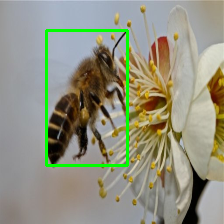

00776e0ed690f96c.txt
20


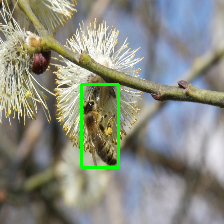

008556630ca207f0.txt
20


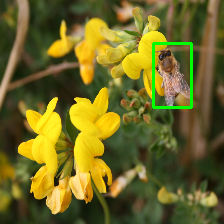

0033d997897ca6b1.txt
20


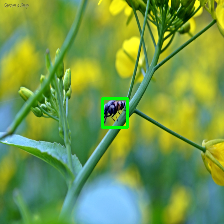

00013bb4b9ddfbab.txt
20


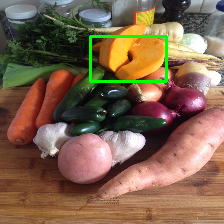

0007a9c8ab376be9.txt
20


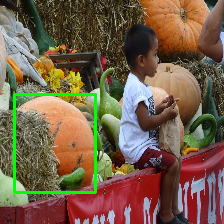

0007da0d5e434ee2.txt
20


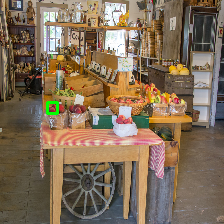

006fe57603a79245.txt
20


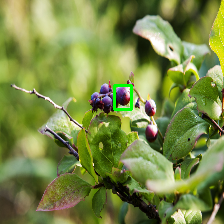

0059eb01bba96297.txt
20


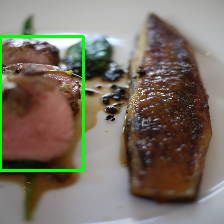

0050c892abc1d615.txt
20


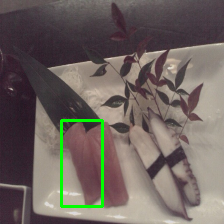

000b50bdd1933a36.txt
20


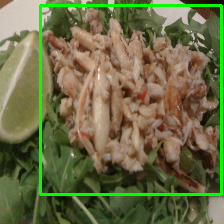

00592435bb819f56.txt
20


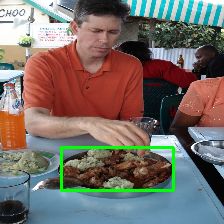

In [ ]:
from google.colab.patches import cv2_imshow
# offset = 100
for image_class in image_classes:
  location = os.listdir(data_location + '/train/'+ image_class + '/labels')
  counter = 0
  for filename in location:
    if counter > 3:
      continue
    counter = counter + 1 
    fileNameSize = len(filename)
    print(filename)
    print(fileNameSize)
    imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
    loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
    notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
    im = cv2.imread(imageLoc)
    height, width, channels = im.shape
    # print(imS.shape)
    imS = cv2.resize(im, (imageWidth, imageHeight)) 
    inputArr = np.array([im]) 
    # print(inputArr)
#
    # x0_1 = int(round(notefile["x0"][0] / width, 2))
    # y0_1 = int(round(notefile["y0"][0] / height, 2))
    # x1_1 = int(round(notefile["x1"][0] / width, 2))
    # y1_1 = int(round(notefile["y1"][0] / height, 2))

    x0_1 = int(notefile["x0"][0]/ width * imageWidth)# *imageWidth)
    y0_1 = int(notefile["y0"][0]/ height * imageHeight)#*imageHeight)
    x1_1 = int(notefile["x1"][0]/ width * imageWidth)#*imageWidth)
    y1_1 = int(notefile["y1"][0]/ height * imageHeight)#*imageHeight)

    # print(x0_1)
    # print(y0_1)
    # print(x1_1)
    # print(y1_1)
    # print(x0)
    cv2.rectangle(imS, (x0_1,  y0_1), (x1_1, y1_1), (0,255,0), 2)
    cv2_imshow(imS) 

In [ ]:
BATCH_SIZE = 16
IMG_SIZE = (imageHeight, imageWidth)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
#Freeze the convolutional base to use as a feature extractor


feature_batch = base_model(X_test1)
print(feature_batch.shape)

(84, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(84, 1280)


In [ ]:
trainTargets = {
    "cl_head": Y_train,
    "bb_head": Z_train
}
validationTargets = {
    "cl_head": Y_test,
    "bb_head": Z_test
}

Y_test.shape

(753, 3)

In [ ]:
input_layer = tf.keras.Input(shape=(imageHeight, imageWidth, 3))
x = data_augmentation(input_layer)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
base_layers = tf.keras.layers.Dropout(0.2)(x)

In [ ]:
locator_branch = tf.keras.layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = tf.keras.layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = tf.keras.layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = tf.keras.layers.Dense(4, activation='sigmoid', name='bb_head')(locator_branch)

In [ ]:
classifier_branch = tf.keras.layers.Flatten()(base_layers)
classifier_branch = tf.keras.layers.Dense(256,  name='cl_1', activation="relu")(classifier_branch)
classifier_branch = tf.keras.layers.Dense(len(image_classes), name='cl_head', activation='softmax')(classifier_branch)


In [ ]:
model = tf.keras.Model(input_layer,  outputs=[classifier_branch,locator_branch])

In [ ]:
losses = {"cl_head":tf.keras.losses.BinaryCrossentropy(from_logits=True), 
   "bb_head":tf.keras.losses.MSE}

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=losses,
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0           ['sequential[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 224, 224, 3)  0           ['tf.math.truediv[0][0]']    

In [ ]:
# trainTargets = {
#     "cl_head": y_train,
#     "bb_head": z_train
# }
# validationTargets = {
#     "cl_head": y_test,
#     "bb_head": z_test
# }

In [ ]:
len(model.trainable_variables)

12

In [ ]:
test_accuracy=model.evaluate(X_test,validationTargets,verbose=0)
# loss0, accuracy0 = model.evaluate(X_test, validationTargets)
# print(accuracy0)
print(test_accuracy[1])
print(test_accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


0.704382598400116
[0.8637323379516602, 0.704382598400116, 0.15934976935386658, 0.365205854177475, 0.32270917296409607]


In [ ]:
initial_epochs = 10
history = model.fit(X_train, trainTargets,
                    epochs=initial_epochs,
                    validation_data=(X_test, validationTargets))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 64s 2s/step - loss: 0.6351 - cl_head_loss: 0.5659 - bb_head_loss: 0.0692 - cl_head_accuracy: 0.5581 - bb_head_accuracy: 0.5039 - val_loss: 0.4816 - val_cl_head_loss: 0.4223 - val_bb_head_loss: 0.0593 - val_cl_head_accuracy: 0.7543 - val_bb_head_accuracy: 0.5392
Epoch 2/10
29/29 [==============================] - 61s 2s/step - loss: 0.4502 - cl_head_loss: 0.3989 - bb_head_loss: 0.0513 - cl_head_accuracy: 0.7575 - bb_head_accuracy: 0.5504 - val_loss: 0.3978 - val_cl_head_loss: 0.3384 - val_bb_head_loss: 0.0594 - val_cl_head_accuracy: 0.8220 - val_bb_head_accuracy: 0.5498
Epoch 3/10
29/29 [==============================] - 60s 2s/step - loss: 0.3714 - cl_head_loss: 0.3225 - bb_head_loss: 0.0489 - cl_head_accuracy: 0.8272 - bb_head_accuracy: 0.5493 - val_loss: 0.3450 - val_cl_head_loss: 0.2891 - val_bb_head_loss: 0.0559 - val_cl_head_accuracy: 0.8526 - val_bb_head_accuracy: 0.5591
Epoch 4/10
29/29 [==============================] - 61s 2s/step - los

### Un-freeze the top layers of the model


In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [ ]:
losses = {"cl_head":tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
   "bb_head":tf.keras.losses.MSE}
model.compile(loss=losses,
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
len(model.trainable_variables)

66

### Continue training the model

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train, trainTargets,
                         epochs=20,
                         initial_epoch=history.epoch[-1])

Epoch 10/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 60s 2s/step - loss: 0.3052 - cl_head_loss: 0.2657 - bb_head_loss: 0.0396 - cl_head_accuracy: 0.8970 - bb_head_accuracy: 0.5836
Epoch 11/20
29/29 [==============================] - 54s 2s/step - loss: 0.2695 - cl_head_loss: 0.2295 - bb_head_loss: 0.0400 - cl_head_accuracy: 0.9014 - bb_head_accuracy: 0.5748
Epoch 12/20
29/29 [==============================] - 55s 2s/step - loss: 0.2321 - cl_head_loss: 0.1924 - bb_head_loss: 0.0397 - cl_head_accuracy: 0.9258 - bb_head_accuracy: 0.5703
Epoch 13/20
29/29 [==============================] - 53s 2s/step - loss: 0.1912 - cl_head_loss: 0.1528 - bb_head_loss: 0.0384 - cl_head_accuracy: 0.9424 - bb_head_accuracy: 0.6047
Epoch 14/20
29/29 [==============================] - 53s 2s/step - loss: 0.2077 - cl_head_loss: 0.1682 - bb_head_loss: 0.0395 - cl_head_accuracy: 0.9258 - bb_head_accuracy: 0.5703
Epoch 15/20
29/29 [==============================] - 53s 2s/step - loss: 0.1793 - cl_head_loss: 0.1408 - bb_head

In [ ]:
model.metrics_names

['loss',
 'cl_head_loss',
 'bb_head_loss',
 'cl_head_accuracy',
 'bb_head_accuracy']

In [ ]:
#accuracy, recall, precision and F1 classification and localization


In [ ]:
# z_pred = model.predict(z_test, verbose=0)
# print(z_pred[0])

# z_pred_num = np.argmax(z_pred[0], axis=1)
# print(z_pred_num)

In [ ]:
# predict probabilities for test set
# yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
# yhat_classes = model.predict(X_test, verbose=0)

#Isimam prediktintus bounding boxus kartu su originaliais bounding boxais


y_pred = model.predict(X_test, verbose=0)
# print(y_pred)
# print(y_pred[0])
predictions_z = y_pred[1]
y_pred_num = np.argmax(y_pred[0], axis=1)
# print(y_pred_num)
# [i for i,prob in enumerate(y_pred) if prob > 0.5]

In [ ]:
predies = model.predict(X_test, verbose=0)
predies[0]

array([[2.8629907e-05, 1.4317644e-04, 9.9982822e-01],
       [6.4583845e-05, 1.2956654e-01, 8.7036884e-01],
       [9.9995768e-01, 2.6769070e-05, 1.5506452e-05],
       ...,
       [9.9978572e-01, 6.8557361e-05, 1.4579210e-04],
       [8.8406969e-03, 9.8957539e-01, 1.5838959e-03],
       [9.9781382e-01, 1.7908250e-03, 3.9543977e-04]], dtype=float32)

In [ ]:
print(X_test[0])



[[[ 65  75 105]
  [ 60  83 167]
  [ 65  83 165]
  ...
  [ 32  21  23]
  [ 26  18  19]
  [ 24  13  15]]

 [[101 118 192]
  [ 71 104 240]
  [ 64  96 232]
  ...
  [ 40  27  31]
  [ 35  27  29]
  [ 34  23  25]]

 [[ 91 109 177]
  [ 60 100 236]
  [ 52  94 236]
  ...
  [ 43  26  35]
  [ 39  29  32]
  [ 36  25  26]]

 ...

 [[ 68  67  76]
  [ 73  72  82]
  [ 90  88 100]
  ...
  [204 215 255]
  [204 214 252]
  [203 208 239]]

 [[ 81  81  87]
  [ 89  88  97]
  [ 77  76  86]
  ...
  [210 216 253]
  [209 213 249]
  [204 208 237]]

 [[ 54  55  59]
  [ 60  60  66]
  [ 43  42  51]
  ...
  [144 150 169]
  [146 150 170]
  [137 143 158]]]


In [ ]:
from google.colab.patches import cv2_imshow


for image_class in image_classes:
  location = os.listdir(data_location + '/train/'+ image_class + '/labels')
  counter = 0
  for filename in location:
    if counter > 3:
      continue
    counter = counter + 1 
    fileNameSize = len(filename)
    print(filename)
    print(fileNameSize)
    imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
    loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
    notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
    im = cv2.imread(imageLoc)
    print(im)

002193b116eaf701.txt
20
[[[174 174 174]
  [174 174 174]
  [173 173 173]
  ...
  [156 181 191]
  [168 193 203]
  [174 199 209]]

 [[168 168 168]
  [168 168 168]
  [167 167 167]
  ...
  [150 175 185]
  [162 187 197]
  [168 193 203]]

 [[156 156 156]
  [156 156 156]
  [156 156 156]
  ...
  [138 163 173]
  [151 176 186]
  [157 182 192]]

 ...

 [[126 130 135]
  [125 129 134]
  [125 129 134]
  ...
  [163 171 178]
  [176 184 191]
  [183 191 198]]

 [[126 130 135]
  [125 129 134]
  [125 129 134]
  ...
  [163 171 178]
  [177 185 192]
  [184 192 199]]

 [[126 130 135]
  [125 129 134]
  [125 129 134]
  ...
  [164 172 179]
  [178 186 193]
  [184 192 199]]]
00776e0ed690f96c.txt
20
[[[ 66 102 120]
  [ 71 105 128]
  [ 73 107 136]
  ...
  [160 169 173]
  [160 168 175]
  [158 166 173]]

 [[ 67 102 122]
  [ 67 103 127]
  [ 69 103 133]
  ...
  [157 166 170]
  [157 165 172]
  [159 167 174]]

 [[ 63  99 123]
  [ 64 101 129]
  [ 64 101 135]
  ...
  [157 166 170]
  [157 165 172]
  [158 166 173]]

 ...

 [[ 

%f %f %f %f 0.33013746 0.5215156 0.2500835 0.7231836


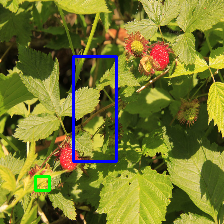

In [ ]:
from google.colab.patches import cv2_imshow
#  y1_1 = int(round(notefile["y1"][0] / height, 2) * imageHeight)

predictions_z1 = predictions_z[14]

Z_test1 = Z_test[14]

X_test2 = X_test[14]

    # x0 = int(prediction[1][0][0] * imageWidth)
x_zer, y_zer, x_one, y_one = predictions_z1[0], predictions_z1[1], predictions_z1[2], predictions_z1[3], 
print('%f %f %f %f',x_zer,x_one,y_zer,y_one)
x_zer1, y_zer1, x_one1, y_one1 = Z_test1[0], Z_test1[1], Z_test1[2], Z_test1[3], 
x_zer = int(x_zer * imageWidth)
y_zer = int(y_zer * imageHeight)
x_one = int(x_one * imageWidth)
y_one = int(y_one * imageHeight)

x_zer1 = int(x_zer1 * imageWidth)
y_zer1 = int(y_zer1 * imageHeight)
x_one1 = int(x_one1 * imageWidth)
y_one1 = int(y_one1 * imageHeight)
# print(Z_test[0])


height, width, channels = X_test[0].shape
# print(height, width)
# print(imageHeight, imageWidth)

cv2.rectangle(X_test2, (x_zer,  y_zer), (x_one, y_one), (255,0,0), 2)
cv2.rectangle(X_test2, (x_zer1,  y_zer1), (x_one1, y_one1), (0,255,0), 2)
cv2_imshow(X_test2) 

In [ ]:
#Transponuojam is [0, 0, 1] i forma - 3

predictions_y = []
one_arr = np.array([1, 0, 0], float)
two_arr = np.array([0, 1, 0], float)
three_arr = np.array([0, 0, 1], float)
for pred in y_pred_num:
  # predictions_y = predictions_y + [pred]
  if pred==0:
    predictions_y.append(one_arr)
  if pred==1:
    predictions_y.append(two_arr)
  if pred==2:
    predictions_y.append(three_arr)
# for i in range(6):
#   predictions_y.append([0, 2, 3])
predictions_y = np.array(predictions_y)
# print(predictions_y)

In [ ]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
def iou(true_bbox, pred_bbox):
    with torch.no_grad():
        pred_bbox = pred_bbox.clip(0, 1)
        x11, y11, x12, y12 = true_bbox[0], true_bbox[1], true_bbox[2], true_bbox[3]
        x21, y21, x22, y22 = pred_bbox[0], pred_bbox[1], pred_bbox[2], pred_bbox[3]
        # x12, y12 = x11 + w1, y11 + h1
        # x22, y22 = x21 + w2, y21 + h2
        w1, h1 = x12 - x11, y12 - y11
        w2, h2 = x22 - x21, y22 - y21
        area1, area2 = w1 * h1, w2 * h2

        xi1, yi1, xi2, yi2 = torch.max(x11, x21), torch.max(y11, y21), torch.min(x12, x22), torch.min(y12, y22)

        intersect = (xi2-xi1).clamp(0) * (yi2-yi1).clamp(0)
        union = area1 + area2 - intersect


    return intersect / (union + 1e-6)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	# print('inter %f', interArea)
	# print('boxA %f', abs(boxAArea - boxBArea) / float(boxBArea))
	# print('boxB %f', abs(boxAArea - boxBArea) / float(boxAArea))
	fp = abs(boxAArea - boxBArea) / float(boxBArea)
	fn = abs(boxAArea - boxBArea) / float(boxAArea)
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou #, fp, fn

In [ ]:
# tp, fp, fn = bb_intersection_over_union(z_test[1], predictions_z[1])

# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# print()
# print(precision)
# print(recall)

In [ ]:
# accuracy = accuracy_score(y_test, predictions_y)
# fp = 0
# for i in range(len(predictions_y)):
#   print(' %f == %f', predictions_y[i], y_test[i])
#   if (predictions_y[i] == y_test[i]).all():
#     fp = fp + 1

# print(len(predictions_y))
# fp = fp / len(predictions_y)
# print(fp)

In [ ]:
predic = 0
true_positive = 0
false_negative = 0
false_positive = 0
# predic = bb_intersection_over_union(z_test[0], predictions_z[0])
for i in range(len(predictions_z)):
  # z_pred = bb_intersection_over_union(Z_test[i], predictions_z[i])
  predy = iou(torch.tensor(Z_test[i]), torch.tensor(predictions_z[i]))
  predicted = predy.item()
  # print(predy.item())
  # print(z_pred)
  predic = predic + predicted
  if predicted >= 0.5:
    true_positive = true_positive + 1
  elif predicted == 0:
    false_positive = false_positive + 1
  elif predicted < 0.5:
    # print(z_pred)
    false_negative = false_negative + 1


true_positive = true_positive / len(predictions_z)
false_negative = false_negative / len(predictions_z)
false_positive = false_positive / len(predictions_z)
print(true_positive)
print(false_positive)
print(false_negative)

predic = predic / len(predictions_z)

0.18326693227091634
0.17928286852589642
0.6374501992031872


In [ ]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)



In [ ]:
print('localization precision: %f' % precision)
print('localization Recall: %f' % recall)
print('localization Accuracy: %f' % predic)

localization precision: 0.505495
localization Recall: 0.223301
localization Accuracy: 0.260527


002193b116eaf701.txt
20
(224, 224, 3)
[[0.14401922 0.17454737 0.79944587 0.83998907]]
47
31
127
165


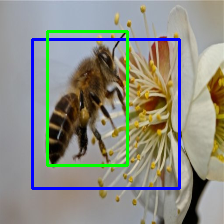

00776e0ed690f96c.txt
20
(224, 224, 3)
[[0.32763338 0.31944746 0.65006024 0.6880235 ]]
80
85
118
168


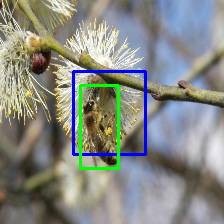

008556630ca207f0.txt
20
(224, 224, 3)
[[0.36015338 0.2738511  0.62337047 0.7181341 ]]
152
44
192
107


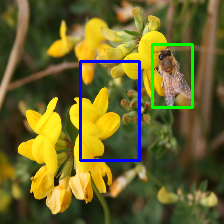

0033d997897ca6b1.txt
20
(224, 224, 3)
[[0.37739134 0.3923158  0.4400475  0.5414418 ]]
103
98
127
127


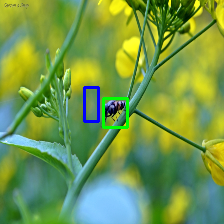

00013bb4b9ddfbab.txt
20
(224, 224, 3)
[[0.1790401  0.31208974 0.6221827  0.7149355 ]]
89
35
165
80


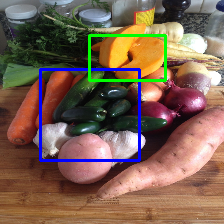

0007a9c8ab376be9.txt
20
(224, 224, 3)
[[0.22631744 0.4233898  0.77751803 0.8312104 ]]
15
94
96
192


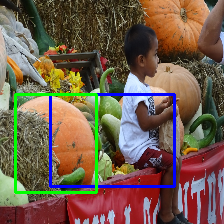

0007da0d5e434ee2.txt
20
(224, 224, 3)
[[0.2919875  0.49603224 0.6737423  0.7540978 ]]
47
103
58
114


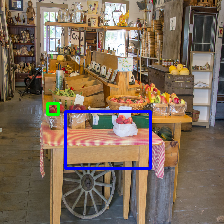

006fe57603a79245.txt
20
(224, 224, 3)
[[0.4116045  0.35181516 0.5051743  0.64193404]]
114
85
132
109


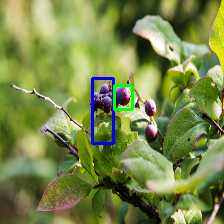

0059eb01bba96297.txt
20
(224, 224, 3)
[[0.09420404 0.13975221 0.89781666 0.8259399 ]]
0
35
82
170


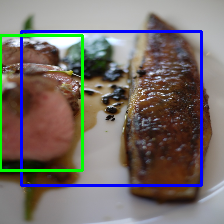

0050c892abc1d615.txt
20
(224, 224, 3)
[[0.309318   0.43651444 0.58697623 0.50092536]]
62
120
103
206


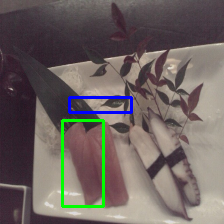

000b50bdd1933a36.txt
20
(224, 224, 3)
[[0.12280861 0.18173951 0.8734776  0.85483646]]
40
4
221
194


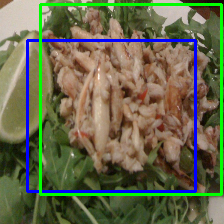

00592435bb819f56.txt
20
(224, 224, 3)
[[0.19478247 0.39504036 0.75852513 0.8398427 ]]
60
147
172
190


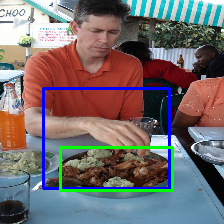

In [ ]:
from google.colab.patches import cv2_imshow
offset = 100
for image_class in image_classes:
  location = os.listdir(data_location + '/train/'+ image_class + '/labels')
  counter = 0
  for filename in location:
    if counter > 3:
      continue
    counter = counter + 1 
    fileNameSize = len(filename)
    print(filename)
    print(fileNameSize)
    imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
    loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
    notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
    im = cv2.imread(imageLoc)
    height, width, channels = im.shape

    print(imS.shape)
    imS = cv2.resize(im, (imageWidth, imageHeight)) 
    inputArr = np.array([imS]) 
    # print(inputArr)
    prediction = model.predict(inputArr)
    print(prediction[1])
    # x0_1 = int(round(notefile["x0"][0] / width, 2))
    # y0_1 = int(round(notefile["y0"][0] / height, 2))
    # x1_1 = int(round(notefile["x1"][0] / width, 2))
    # y1_1 = int(round(notefile["y1"][0] / height, 2))

    x0_1 = int(round(notefile["x0"][0] / width, 2) * imageWidth )
    y0_1 = int(round(notefile["y0"][0] / height, 2) * imageHeight)
    x1_1 = int(round(notefile["x1"][0] / width, 2) * imageWidth)
    y1_1 = int(round(notefile["y1"][0] / height, 2) * imageHeight)

    x0 = int(prediction[1][0][0] * imageWidth)
    y0 = int(prediction[1][0][1] * imageHeight)
    x1 = int(prediction[1][0][2] * imageWidth)
    y1 = int(prediction[1][0][3] * imageHeight)

    print(x0_1)
    print(y0_1)
    print(x1_1)
    print(y1_1)
    # print(x0)
    cv2.rectangle(imS, (x0,  y0), (x1, y1), (255,0,0), 2) # Blue - predicted
    cv2.rectangle(imS, (x0_1,  y0_1), (x1_1, y1_1), (0,255,0), 2) # Green - guessed
    cv2_imshow(imS) 

In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, predictions_y)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, predictions_y, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, predictions_y, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, predictions_y, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.875166
Precision: 0.885489
Recall: 0.875166
F1 score: 0.872260


(224, 224, 3)
[[0.41959375 0.33673948 0.6029548  0.59868604]]


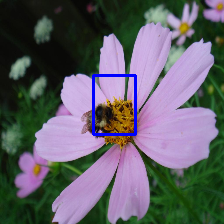

(224, 224, 3)
[[0.08897361 0.28271538 0.49653748 0.7355148 ]]


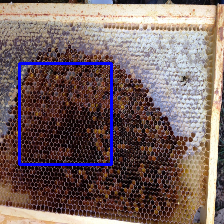

(224, 224, 3)
[[0.3869965 0.2825042 0.4753032 0.6561702]]


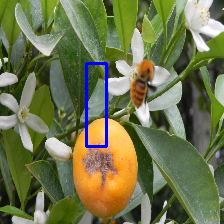

(224, 224, 3)
[[0.21197495 0.36210066 0.74183196 0.7555983 ]]


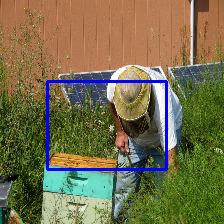

(224, 224, 3)
[[0.38977107 0.40213597 0.5643153  0.6046415 ]]


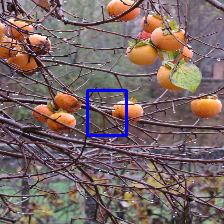

(224, 224, 3)
[[0.28520298 0.35425276 0.44734025 0.6156814 ]]


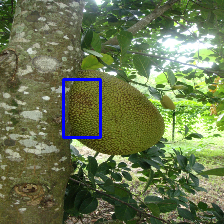

(224, 224, 3)
[[0.20348817 0.4899131  0.56452715 0.67887044]]


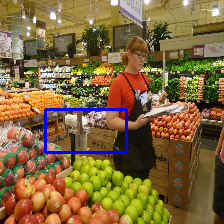

(224, 224, 3)
[[0.1827155 0.2892251 0.7164794 0.8125866]]


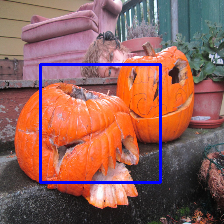

(224, 224, 3)
[[0.24618632 0.24854517 0.79540884 0.6798017 ]]


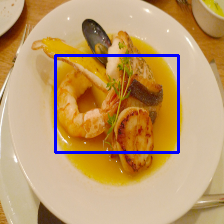

(224, 224, 3)
[[0.19103152 0.25738025 0.7726883  0.8049091 ]]


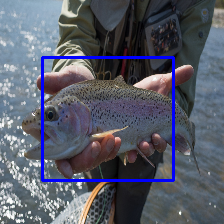

(224, 224, 3)
[[0.07411757 0.1544835  0.7213514  0.84252787]]


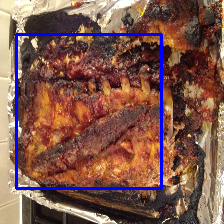

(224, 224, 3)
[[0.24652639 0.33622468 0.8336294  0.70603275]]


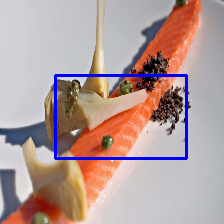

In [ ]:
from google.colab.patches import cv2_imshow
# offset = 100
for image_class in image_classes:
  location = os.listdir(data_location + '/test/'+ image_class + '/labels')
  counter = 0
  for filename in location:
    if counter > 3:
      continue
    counter = counter + 1 
    fileNameSize = len(filename)
    imageLoc = data_location + '/test/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
    loc = data_location + '/test/'+ image_class + '/labels' + '/' + filename
    notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
    im = cv2.imread(imageLoc)
    print(imS.shape)
    height, width, channels = im.shape
    imS = cv2.resize(im, (imageWidth, imageHeight)) 
    inputArr = np.array([imS]) 
    # print(inputArr)
    prediction = model.predict(inputArr)
    print(prediction[1])
    x0 = int(prediction[1][0][0] * imageWidth)
    y0 = int(prediction[1][0][1]* imageHeight)
    x1 = int(prediction[1][0][2] * imageWidth)
    y1 = int(prediction[1][0][3] * imageHeight)
    cv2.rectangle(imS, (x0,  y0), (x1, y1), (255,0,0), 2)
    cv2_imshow(imS) 

(3448, 2309, 3)
[[0.3583588 0.3550881 0.5659273 0.6356915]]
60
147
172
190


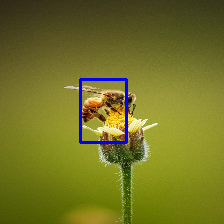

(5184, 3456, 3)
[[0.19945389 0.32382292 0.7042728  0.670777  ]]
60
147
172
190


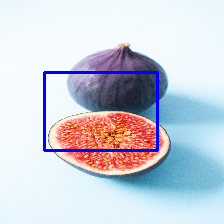

(2268, 4032, 3)
[[0.11048257 0.12306875 0.8404453  0.9063417 ]]
60
147
172
190


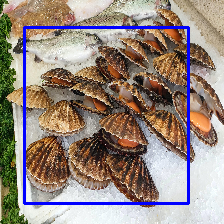

In [ ]:
from google.colab.patches import cv2_imshow

locations = ['/content/drive/MyDrive/gmm/0.jpg', '/content/drive/MyDrive/gmm/1.jpg', '/content/drive/MyDrive/gmm/2.jpg']
offset = 100
for location in locations:
  # location = os.listdir(data_location + '/train/'+ image_class + '/labels')
  # counter = 0

  # counter = counter + 1 
  # fileNameSize = len(filename)
  # print(filename)
  # print(fileNameSize)
  # imageLoc = data_location + '/train/'+ image_class + '/' +  filename[:fileNameSize - 3]  +'jpg' 
  # loc = data_location + '/train/'+ image_class + '/labels' + '/' + filename
  # notefile = pd.read_csv(loc,delim_whitespace=True, names=["class", "x0", "y0", "x1", "y1"])
  im = cv2.imread(location)
  height, width, channels = im.shape

  print(im.shape)
  imS = cv2.resize(im, (imageWidth, imageHeight)) 
  inputArr = np.array([imS]) 
  # print(inputArr)
  prediction = model.predict(inputArr)
  print(prediction[1])
  # x0_1 = int(round(notefile["x0"][0] / width, 2))
  # y0_1 = int(round(notefile["y0"][0] / height, 2))
  # x1_1 = int(round(notefile["x1"][0] / width, 2))
  # y1_1 = int(round(notefile["y1"][0] / height, 2))

  # x0_1 = int(round(notefile["x0"][0] / width, 2) * imageWidth )
  # y0_1 = int(round(notefile["y0"][0] / height, 2) * imageHeight)
  # x1_1 = int(round(notefile["x1"][0] / width, 2) * imageWidth)
  # y1_1 = int(round(notefile["y1"][0] / height, 2) * imageHeight)

  x0 = int(prediction[1][0][0] * imageWidth)
  y0 = int(prediction[1][0][1] * imageHeight)
  x1 = int(prediction[1][0][2] * imageWidth)
  y1 = int(prediction[1][0][3] * imageHeight)

  print(x0_1)
  print(y0_1)
  print(x1_1)
  print(y1_1)
  # print(x0)
  cv2.rectangle(imS, (x0,  y0), (x1, y1), (255,0,0), 2) # Blue - predicted
  # cv2.rectangle(imS, (x0_1,  y0_1), (x1_1, y1_1), (0,255,0), 2) # Green - guessed
  cv2_imshow(imS) 